<a href="https://colab.research.google.com/github/eemayes2/IE517_F21_HW5/blob/main/IE517_HWK5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Check if any null values we need to change
def num_missing(x):
    return sum(x.isnull())

In [2]:
#Read in Data
df = pd.read_csv('hw5_treasury yield curve data.csv', header=0)
#Reminder: ATT1-13 is noise, MEDV is target variable
df.head()

,Date,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,SVENF11,SVENF12,SVENF13,SVENF14,SVENF15,SVENF16,SVENF17,SVENF18,SVENF19,SVENF20,SVENF21,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,5/17/2019,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,2.8498,2.8899,2.9283,2.9667,3.0063,3.0477,3.0912,3.1368,3.1843,3.2335,3.2840,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,5/16/2019,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,2.8703,2.9113,2.9503,2.9892,3.0291,3.0707,3.1143,3.1598,3.2071,3.2561,3.3063,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,5/15/2019,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,2.8422,2.8862,2.9293,2.9728,3.0173,3.0633,3.1107,3.1592,3.2087,3.2587,3.3089,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,5/14/2019,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,2.8726,2.9135,2.9539,2.9954,3.0386,3.0841,3.1318,3.1815,3.2330,3.2858,3.3396,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,5/13/2019,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,2.8472,2.8894,2.9315,2.9747,3.0195,3.0662,3.1146,3.1645,3.2155,3.2672,3.3192,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [3]:
df = df.drop(columns = ['Date'])
print(df.apply(num_missing, axis = 0))

SVENF01      0
SVENF02      0
SVENF03      0
SVENF04      0
SVENF05      0
SVENF06      0
SVENF07      0
SVENF08      0
SVENF09      0
SVENF10      0
SVENF11      0
SVENF12      0
SVENF13      0
SVENF14      0
SVENF15      0
SVENF16      0
SVENF17      0
SVENF18      0
SVENF19      0
SVENF20      0
SVENF21      0
SVENF22      0
SVENF23      0
SVENF24      0
SVENF25      0
SVENF26      0
SVENF27      0
SVENF28      0
SVENF29      0
SVENF30      0
Adj_Close    0
dtype: int64


## Part 1: EDA

Before Standardizing

In [4]:
df.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,SVENF11,SVENF12,SVENF13,SVENF14,SVENF15,SVENF16,SVENF17,SVENF18,SVENF19,SVENF20,SVENF21,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,6.114960,6.133891,6.133095,6.116199,6.086309,6.046063,5.997680,5.943023,5.883646,5.820842,5.755680,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,1.948384,1.930704,1.913565,1.896877,1.880709,1.865233,1.850679,1.837315,1.825424,1.815285,1.807164,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,2.030900,2.075900,2.127200,2.187500,2.258100,2.339500,2.431700,2.486300,2.220200,1.971100,1.722100,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,4.914800,4.923700,4.913450,4.876650,4.783700,4.702150,4.630500,4.551250,4.472000,4.385000,4.281300,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,6.133200,6.142700,6.148200,6.144300,6.128200,6.091400,6.036700,5.976100,5.908300,5.831600,5.735400,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,7.480750,7.539750,7.588300,7.619000,7.625050,7.613300,7.582050,7.544100,7.498900,7.461800,7.418100,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,10.571000,10.532600,10.533800,10.534500,10.534800,10.535000,10.535000,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 31 Text major ticklabel objects>)

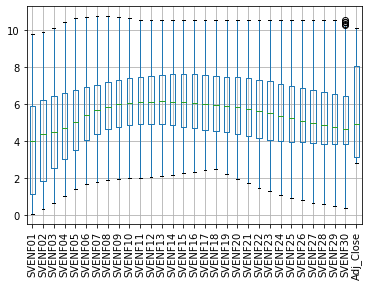

In [27]:
#Boxplots
df.boxplot()
plt.xticks(rotation = 90)

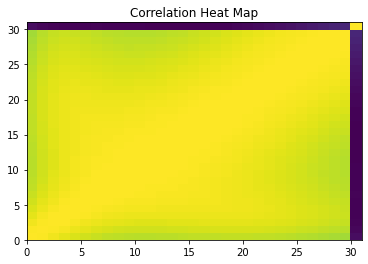

In [6]:
corMat = pd.DataFrame(df.corr())

plt.pcolor(corMat)
plt.title("Correlation Heat Map")
plt.show()

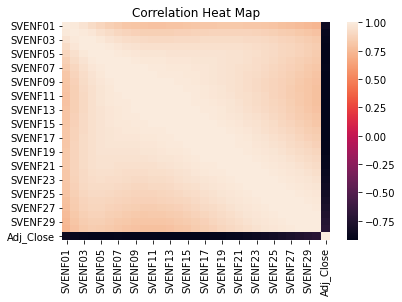

In [7]:
correlation_mat = df.corr()

sns.heatmap(correlation_mat, annot = False)
plt.title("Correlation Heat Map")
plt.show()

#heavy correlation for most features

In [8]:
#Split into training-test sets
from sklearn.model_selection import train_test_split

x = df.drop(columns = ['Adj_Close'])
x.head()

X_train, X_test, y_train, y_test = train_test_split(x, df['Adj_Close'], test_size=0.15, random_state=42)

In [9]:
#Standardize with standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## PCA on dataset


In [10]:
#Cumulative explained variance
cov_mat = np.cov(X_train_std.T)
eigenvals, eigenvecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigenvals)



Eigenvalues 
[2.79579848e+01 1.22313057e+00 6.55411544e-01 1.45561136e-01
 1.99031388e-02 2.06243818e-03 2.84492074e-04 3.29679042e-05
 2.55310505e-06 2.02358034e-07 1.41807223e-08 1.14065184e-09
 1.87834406e-10 2.79223564e-10 1.97434888e-10 2.08170843e-10
 2.16456135e-10 2.61581427e-10 2.21833140e-10 2.26975790e-10
 2.24866287e-10 2.31123423e-10 2.57846729e-10 2.56093138e-10
 2.35379808e-10 2.52582442e-10 2.49758675e-10 2.38344430e-10
 2.43769541e-10 2.44978760e-10]


In [11]:
tot = sum(eigenvals)
var_exp = [(i/tot) for i in sorted(eigenvals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

print(var_exp)
print(cum_var_exp)

print(len(var_exp))

[0.9317969749380347, 0.04076507559642957, 0.021843866774838572, 0.004851330579495056, 0.000663341249742568, 6.87379176250734e-05, 9.481686747978828e-06, 1.0987699468249641e-06, 8.509109602390575e-08, 6.744284524055292e-09, 4.726218380051956e-10, 3.8016185315353525e-11, 9.306095353676375e-12, 8.71810986919668e-12, 8.593638070386526e-12, 8.535193547628366e-12, 8.418187396993204e-12, 8.324075570815556e-12, 8.164768289399366e-12, 8.12446687552559e-12, 7.943656188689898e-12, 7.84484986872113e-12, 7.702991064291871e-12, 7.564756762006768e-12, 7.494450263299693e-12, 7.393360094241526e-12, 7.2141527135822344e-12, 6.9380165690743895e-12, 6.580203582839132e-12, 6.260234154352169e-12]
[0.93179697 0.97256205 0.99440592 0.99925725 0.99992059 0.99998933
 0.99999881 0.99999991 0.99999999 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]
30


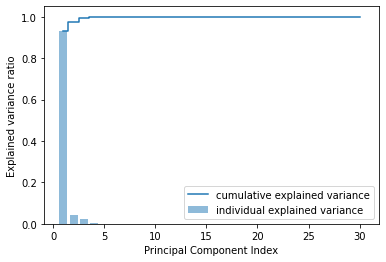

In [12]:
plt.bar(range(1,31), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1,31), cum_var_exp, where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc = 'best')
plt.show()

In [13]:
print("Cumulative explained variance for 3 components: " + str(cum_var_exp[2]))

Cumulative explained variance for 3 components: 0.994405917309303


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

## Lin Reg v. SVM Reg: Baseline

Linear Regression: Full set

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lreg = lr.fit(X_train_std, y_train)
y_pred = lreg.predict(X_test_std)
y_train_pred = lreg.predict(X_train_std)

In [16]:
print("Train Score: " + str(lreg.score(X_train_std, y_train)))
print("Test Score: " + str(lreg.score(X_test_std, y_test)))
print("Mean Squared Error (MSE): " + str(mean_squared_error(y_test, y_pred)))
print("RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred))))

print("Train R^2: " + str(r2_score(y_train, y_train_pred)))
print("Test R^2: " + str(r2_score(y_test, y_pred)))

Train Score: 0.9022730353400435
Test Score: 0.9041309535337262
Mean Squared Error (MSE): 0.6121021683244493
RMSE: 0.7823695855057565
Train R^2: 0.9022730353400437
Test R^2: 0.9041309535337262


Linear Regression: PCA

In [17]:
lr_pca = LinearRegression()
lregpca = lr_pca.fit(X_train_pca, y_train)
y_pred = lregpca.predict(X_test_pca)
y_train_pred = lregpca.predict(X_train_pca)

In [18]:
print("Train Score: " + str(lregpca.score(X_train_pca, y_train)))
print("Test Score: " + str(lregpca.score(X_test_pca, y_test)))
print("Mean Squared Error (MSE): " + str(mean_squared_error(y_test, y_pred)))
print("RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred))))

print("Train R^2: " + str(r2_score(y_train, y_train_pred)))
print("Test R^2: " + str(r2_score(y_test, y_pred)))

Train Score: 0.8672181160186359
Test Score: 0.8662415053375473
Mean Squared Error (MSE): 0.8540177213873134
RMSE: 0.924130792359671
Train R^2: 0.8672181160186357
Test R^2: 0.8662415053375473


SVM Reg: Baseline

In [19]:
from sklearn import svm
clf_svr = svm.SVR(kernel = 'linear')
clf_svr.fit(X_train_std, y_train)
y_pred = clf_svr.predict(X_test_std)
y_train_pred = clf_svr.predict(X_train_std)

In [20]:
print("Train Score: " + str(clf_svr.score(X_train_std, y_train)))
print("Test Score: " + str(clf_svr.score(X_test_std, y_test)))
print("Mean Squared Error (MSE): " + str(mean_squared_error(y_test, y_pred)))
print("RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred))))

print("Train R^2: " + str(r2_score(y_train, y_train_pred)))
print("Test R^2: " + str(r2_score(y_test, y_pred)))

Train Score: 0.8920208361922309
Test Score: 0.8924613825895129
Mean Squared Error (MSE): 0.686609738198755
RMSE: 0.8286191756161301
Train R^2: 0.8920208361922309
Test R^2: 0.8924613825895129


SVM Reg: PCA

In [21]:
clf_svr = svm.SVR(kernel = 'linear')
clf_svr.fit(X_train_pca, y_train)
y_pred = clf_svr.predict(X_test_pca)
y_train_pred = clf_svr.predict(X_train_pca)

In [22]:
print("Train Score: " + str(clf_svr.score(X_train_pca, y_train)))
print("Test Score: " + str(clf_svr.score(X_test_pca, y_test)))
print("Mean Squared Error (MSE): " + str(mean_squared_error(y_test, y_pred)))
print("RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred))))

print("Train R^2: " + str(r2_score(y_train, y_train_pred)))
print("Test R^2: " + str(r2_score(y_test, y_pred)))

Train Score: 0.8624827979809777
Test Score: 0.8611702699819538
Mean Squared Error (MSE): 0.8863964116075648
RMSE: 0.9414862779709351
Train R^2: 0.8624827979809778
Test R^2: 0.8611702699819538


## Statements & Print to PDF

In [23]:
print("My name is Emma Mayes")
print("My NetID is: eemayes2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Emma Mayes
My NetID is: eemayes2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [28]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('IE517_HWK5.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/IE517_HWK5.ipynb to pdf
[NbConvertApp] Support files will be in IE517_HWK5_files/
[NbConvertApp] Making directory ./IE517_HWK5_files
[NbConvertApp] Making directory ./IE517_HWK5_files
[NbConvertApp] Making directory ./IE517_HWK5_files
[NbConvertApp] Making directory ./IE517_HWK5_files
[NbConvertApp] Writing 48865 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 82645 bytes to /content/drive/My Drive/IE517_HWK5.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'